### Load in dataset properties

In [1]:
import openml
import numpy as np
import pandas as pd

###################### obtain the benchmark suites ######################
set_CC18 = openml.study.get_suite('OpenML-CC18')
set_100 = openml.study.get_suite('OpenML100')

dimen_CC18 = []
dimen_100 = []

for task_id in set_CC18.tasks:  # iterate over all tasks
    try:
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        features_CC18, targets_CC18 = task.get_X_and_y()  # get the data
        dimen_CC18.append(np.shape(features_CC18))
    except:
        print('Error in OpenML CC-18 dataset ' + str(task_id))

for task_id in set_100.tasks:  # iterate over all tasks
    try:
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        features_100, targets_100 = task.get_X_and_y()  # get the data
        dimen_100.append(np.shape(features_100))
    except:
        print('Error in OpenML 100 dataset ' + str(task_id))
        
########################## read in accuracies ###########################
acc_SPORF_CC18 = open('SPORF_accuracies_CC-18.txt','r')

SPORF_taskID_CC18 = []
SPORF_name_CC18 = []
SPORF_accuracy_CC18 = []
SPORF_time_CC18 = []
    
for line in acc_SPORF_CC18:
    fields = line.split(',')
    SPORF_taskID_CC18.append(fields[0])
    SPORF_name_CC18.append(fields[1])
    SPORF_accuracy_CC18.append(float(fields[2]))
    SPORF_time_CC18.append(fields[3])

# print(np.shape(SPORF_accuracy_CC18)) <- WORKS!

acc_SPORF_100 = open('SPORF_accuracies_100.txt','r')

SPORF_taskID_100 = []
SPORF_name_100 = []
SPORF_accuracy_100 = []
SPORF_time_100 = []

for line in acc_SPORF_100:
    fields = line.split(',')
    SPORF_taskID_100.append(fields[0])
    SPORF_name_100.append(fields[1])
    SPORF_accuracy_100.append(float(fields[2]))
    SPORF_time_100.append(fields[3])

# print(np.shape(SPORF_accuracy_100)) <- WORKS!

acc_skRF_CC18 = open('sklearnRF_accuracies_CC-18.txt','r')

skRF_taskID_CC18 = []
skRF_name_CC18 = []
skRF_accuracy_CC18 = []
skRF_time_CC18 = []

for line in acc_skRF_CC18:
    fields = line.split(',')
    skRF_taskID_CC18.append(fields[0])
    skRF_name_CC18.append(fields[1])
    skRF_accuracy_CC18.append(float(fields[2]))
    skRF_time_CC18.append(fields[3])

# print(np.shape(skRF_accuracy_CC18)) <- WORKS!

acc_skRF_100 = open('sklearnRF_accuracies_100.txt','r')

skRF_taskID_100 = []
skRF_name_100 = []
skRF_accuracy_100 = []
skRF_time_100 = []

for line in acc_skRF_100:
    fields = line.split(',')
    skRF_taskID_100.append(fields[0])
    skRF_name_100.append(fields[1])
    skRF_accuracy_100.append(float(fields[2]))
    skRF_time_100.append(fields[3])

# print(np.shape(skRF_accuracy_100)) <- WORKS!

Error in OpenML 100 dataset 34536


### Find accuracy differences

In [2]:
acc_diffs_CC18 = []
acc_diffs_100 = []

for i in range(len(SPORF_accuracy_CC18)):
    acc_diffs_CC18.append(SPORF_accuracy_CC18[i]-skRF_accuracy_CC18[i])
    
for i in range(len(SPORF_accuracy_100)):
    acc_diffs_100.append(SPORF_accuracy_100[i]-skRF_accuracy_100[i])
    
print(np.shape(acc_diffs_CC18))
print(np.shape(acc_diffs_100))

# account for error in one OpenML 100 dataset (index 89)
# dimen_100 = np.delete(dimen_100,[89],axis=0)
print(np.shape(dimen_100))

(72,)
(99,)
(99, 2)


### Standardize accuracies

In [3]:
from sklearn.preprocessing import StandardScaler

# z = (x - u) / s

stand_acc_diffs_CC18 = []

for i in range(len(acc_diffs_CC18)):
    stand_acc_diffs_CC18.append((acc_diffs_CC18[i] - np.mean(acc_diffs_CC18))/np.std(acc_diffs_CC18))

stand_acc_diffs_100 = []

for i in range(len(acc_diffs_100)):
    stand_acc_diffs_100.append((acc_diffs_100[i] - np.mean(acc_diffs_100))/np.std(acc_diffs_100))

print(np.mean(acc_diffs_CC18))
print(np.mean(acc_diffs_100))

0.017808333333333343
0.017613131313131317


### Plot differences (scatterplot)

11
17


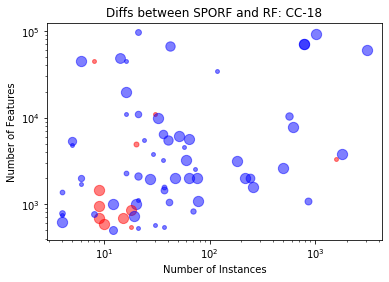

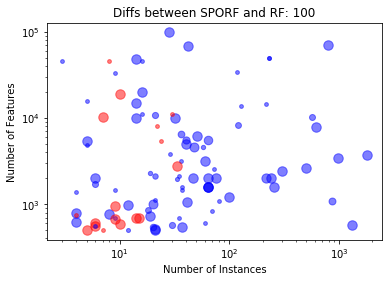

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Dacc_diffs_CC18 = acc_diffs_CC18
Dacc_diffs_100 = acc_diffs_100

a = np.mean(acc_diffs_CC18)-0.01
# print(a)
b = np.mean(acc_diffs_CC18)+0.01
# print(b)

for i in range(len(acc_diffs_CC18)):
    if acc_diffs_CC18[i] > 0:
        if acc_diffs_CC18[i] < (a):
            Dacc_diffs_CC18[i] = a
        if acc_diffs_CC18[i] > (b):
            Dacc_diffs_CC18[i] = b
    else:
        if acc_diffs_CC18[i] > (a*-1):
            Dacc_diffs_CC18[i] = a*-1
        if acc_diffs_CC18[i] < (b*-1):
            Dacc_diffs_CC18[i] = b*-1
# print(np.sort(acc_diffs_CC18))

c = np.mean(acc_diffs_100)-0.01
# print(c)
d = np.mean(acc_diffs_100)+0.01
# print(d)

for i in range(len(acc_diffs_100)):
    if acc_diffs_100[i] > 0:
        if acc_diffs_100[i] < (c):
            Dacc_diffs_100[i] = c
        if acc_diffs_100[i] > (d):
            Dacc_diffs_100[i] = d
    else:
        if acc_diffs_100[i] > (c*-1):
            Dacc_diffs_100[i] = c*-1
        if acc_diffs_100[i] < (d*-1):
            Dacc_diffs_100[i] = d*-1
# print(np.sort(acc_diffs_100))

red_CC18 = 0
plt.figure()
for i in range(len(Dacc_diffs_CC18)):
    if Dacc_diffs_CC18[i] > 0:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'bo',MarkerSize = (Dacc_diffs_CC18[i])*500,alpha=0.5)
    else:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'ro',MarkerSize = (Dacc_diffs_CC18[i])*-500,alpha=0.5)
        red_CC18 += 1
plt.xlabel('Number of Instances')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.title('Diffs between SPORF and RF: CC-18')
        
print(red_CC18)
        
red_100 = 0
plt.figure()
for i in range(len(Dacc_diffs_100)):
    if Dacc_diffs_100[i] > 0:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'bo',MarkerSize = (Dacc_diffs_100[i])*500,alpha=0.5)
    else:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'ro',MarkerSize = (Dacc_diffs_100[i])*-500,alpha=0.5)
        red_100 += 1
plt.xlabel('Number of Instances')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.title('Diffs between SPORF and RF: 100')
        
print(red_100)

### Zoomed in scatterplots (lower left corner) - *did not need this anymore after log scaling!

11
17
11
17


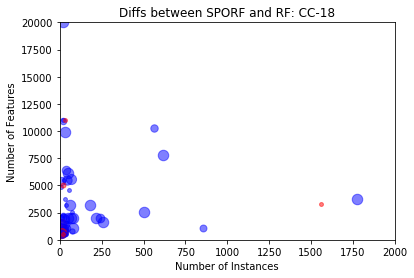

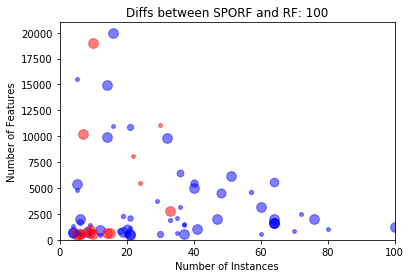

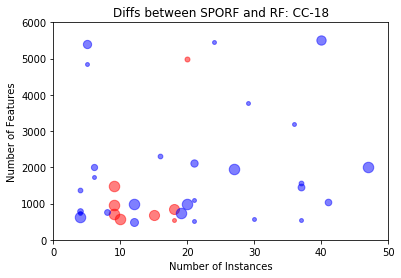

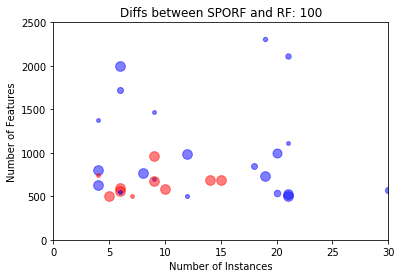

In [8]:
# a = np.mean(acc_diffs_CC18)-0.01
# # print(a)
# b = np.mean(acc_diffs_CC18)+0.01
# # print(b)

# Eacc_diffs_CC18 = acc_diffs_CC18
# Eacc_diffs_100 = acc_diffs_100

# for i in range(len(acc_diffs_CC18)):
#     if acc_diffs_CC18[i] > 0:
#         if acc_diffs_CC18[i] < (a):
#             Eacc_diffs_CC18[i] = a
#         if acc_diffs_CC18[i] > (b):
#             Eacc_diffs_CC18[i] = b
#     else:
#         if acc_diffs_CC18[i] > (a*-1):
#             Eacc_diffs_CC18[i] = a*-1
#         if acc_diffs_CC18[i] < (b*-1):
#             Eacc_diffs_CC18[i] = b*-1
# # print(np.sort(acc_diffs_CC18))

# c = np.mean(acc_diffs_100)-0.01
# # print(c)
# d = np.mean(acc_diffs_100)+0.01
# # print(d)

# for i in range(len(acc_diffs_100)):
#     if acc_diffs_100[i] > 0:
#         if acc_diffs_100[i] < (c):
#             Eacc_diffs_100[i] = c
#         if acc_diffs_100[i] > (d):
#             Eacc_diffs_100[i] = d
#     else:
#         if acc_diffs_100[i] > (c*-1):
#             Eacc_diffs_100[i] = c*-1
#         if acc_diffs_100[i] < (d*-1):
#             Eacc_diffs_100[i] = d*-1
# # print(np.sort(acc_diffs_100))

# red_CC18 = 0
# plt.figure()
# for i in range(len(Eacc_diffs_CC18)):
#     if Eacc_diffs_CC18[i] > 0:
#         plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'bo',MarkerSize = (Eacc_diffs_CC18[i])*500,alpha=0.5)
#     else:
#         plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'ro',MarkerSize = (Eacc_diffs_CC18[i])*-500,alpha=0.5)
#         red_CC18 += 1
# plt.xlabel('Number of Instances')
# plt.ylabel('Number of Features')
# plt.title('Diffs between SPORF and RF: CC-18')
# plt.xlim([0,2000])
# plt.ylim([0,20000])
        
# print(red_CC18)
        
# red_100 = 0
# plt.figure()
# for i in range(len(Eacc_diffs_100)):
#     if Eacc_diffs_100[i] > 0:
#         plt.plot(dimen_100[i][1],dimen_100[i][0],'bo',MarkerSize = (Eacc_diffs_100[i])*500,alpha=0.5)
#     else:
#         plt.plot(dimen_100[i][1],dimen_100[i][0],'ro',MarkerSize = (Eacc_diffs_100[i])*-500,alpha=0.5)
#         red_100 += 1
# plt.xlabel('Number of Instances')
# plt.ylabel('Number of Features')
# plt.title('Diffs between SPORF and RF: 100')
# plt.xlim([0,100])
# plt.ylim([0,21000])

# print(red_100)

# # zoomed in even further!

# red_CC18 = 0
# plt.figure()
# for i in range(len(Eacc_diffs_CC18)):
#     if Eacc_diffs_CC18[i] > 0:
#         plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'bo',MarkerSize = (Eacc_diffs_CC18[i])*500,alpha=0.5)
#     else:
#         plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'ro',MarkerSize = (Eacc_diffs_CC18[i])*-500,alpha=0.5)
#         red_CC18 += 1
# plt.xlabel('Number of Instances')
# plt.ylabel('Number of Features')
# plt.title('Diffs between SPORF and RF: CC-18')
# plt.xlim([0,50])
# plt.ylim([0,6000])
        
# print(red_CC18)
        
# red_100 = 0
# plt.figure()
# for i in range(len(Eacc_diffs_100)):
#     if Eacc_diffs_100[i] > 0:
#         plt.plot(dimen_100[i][1],dimen_100[i][0],'bo',MarkerSize = (Eacc_diffs_100[i])*500,alpha=0.5)
#     else:
#         plt.plot(dimen_100[i][1],dimen_100[i][0],'ro',MarkerSize = (Eacc_diffs_100[i])*-500,alpha=0.5)
#         red_100 += 1
# plt.xlabel('Number of Instances')
# plt.ylabel('Number of Features')
# plt.title('Diffs between SPORF and RF: 100')
# plt.xlim([0,30])
# plt.ylim([0,2500])

# print(red_100)

### Plot differences (bar graph)

In [6]:
# a = np.mean(acc_diffs_CC18)-0.01
# # print(a)
# b = np.mean(acc_diffs_CC18)+0.01
# # print(b)

# for i in range(len(acc_diffs_CC18)):
#     if acc_diffs_CC18[i] > 0:
#         if acc_diffs_CC18[i] < (a):
#             acc_diffs_CC18[i] = a
#         if acc_diffs_CC18[i] > (b):
#             acc_diffs_CC18[i] = b
#     else:
#         if acc_diffs_CC18[i] > (a*-1):
#             acc_diffs_CC18[i] = a*-1
#         if acc_diffs_CC18[i] < (b*-1):
#             acc_diffs_CC18[i] = b*-1
# # print(np.sort(acc_diffs_CC18))

# c = np.mean(acc_diffs_100)-0.01
# # print(c)
# d = np.mean(acc_diffs_100)+0.01
# # print(d)

# for i in range(len(acc_diffs_100)):
#     if acc_diffs_100[i] > 0:
#         if acc_diffs_100[i] < (c):
#             acc_diffs_100[i] = c
#         if acc_diffs_100[i] > (d):
#             acc_diffs_100[i] = d
#     else:
#         if acc_diffs_100[i] > (c*-1):
#             acc_diffs_100[i] = c*-1
#         if acc_diffs_100[i] < (d*-1):
#             acc_diffs_100[i] = d*-1
# # print(np.sort(acc_diffs_100))

# red_CC18 = 0
# plt.figure()
# for i in range(len(acc_diffs_CC18)):
#     if acc_diffs_CC18[i] > 0:
#         plt.bar(dimen_CC18[i][1],dimen_CC18[i][0],'bo')
# #                  ,MarkerSize = (acc_diffs_CC18[i])*500)
#     else:
#         plt.bar(dimen_CC18[i][1],dimen_CC18[i][0],'ro')
# #                  ,MarkerSize = (acc_diffs_CC18[i])*500)
#         red_CC18 += 1
# plt.xlabel('Number of Instances')
# plt.ylabel('Number of Features')
# plt.title('Diffs between SPORF and RF: CC-18')
        
# print(red_CC18)
        
# red_100 = 0
# plt.figure()
# for i in range(len(acc_diffs_100)):
#     if acc_diffs_100[i] > 0:
#         plt.bar(dimen_100[i][1],dimen_100[i][0],'bo')
# #                  ,MarkerSize = (acc_diffs_100[i])*500)
#     else:
#         plt.bar(dimen_100[i][1],dimen_100[i][0],'ro')
# #                  ,MarkerSize = (acc_diffs_100[i])*500)
#         red_100 += 1
# plt.xlabel('Number of Instances')
# plt.ylabel('Number of Features')
# plt.title('Diffs between SPORF and RF: 100')
        
# print(red_100)